In [1]:
import pandas as pd
import numpy as np

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = data.iloc[:, 0:11]
y = data['quality']

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

In [6]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X, y)

bc = BaggingClassifier(n_estimators=100, random_state=42)
bc.fit(X, y)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

print('accuracy_dtc',  cross_val_score(dtc, X, y, cv=10, scoring = 'accuracy').mean())
print('accuracy_bc',  cross_val_score(bc, X, y, cv=10, scoring = 'accuracy').mean())
print('accuracy_rfc',  cross_val_score(rfc, X, y, cv=10, scoring = 'accuracy').mean())

accuracy_dtc 0.4777830188679245
accuracy_bc 0.5578301886792453
accuracy_rfc 0.5734905660377358


In [ ]:
# наилучший результат показал RandomForestClassifier

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [8]:
trees = [10,50,100]

for i in range(200,5001,200):
    trees.append(i)

In [9]:
%%time
df = pd.DataFrame()
i = 0

for val in trees:
    model = BaggingClassifier(n_estimators=val, random_state = 42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df.loc[i, 'trees'] = val
    df.loc[i, 'accuracy'] = accuracy_score(y_test, y_pred)
    i+=1

Wall time: 7min 59s


In [10]:
df.head()

,trees,accuracy
0,10.0,0.643750
1,50.0,0.650000
2,100.0,0.658333
3,200.0,0.662500
4,400.0,0.672917


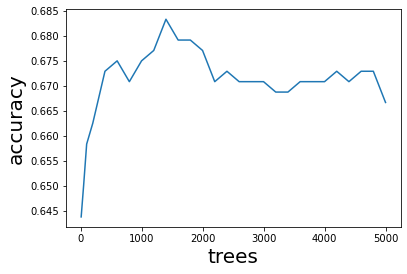

In [11]:
plt.plot(df['trees'], df['accuracy'])
plt.xlabel('trees', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [12]:
skl = GradientBoostingClassifier()
skl.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[14:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
acc_xgb = cross_val_score(xgb, X_test, y_test, cv=10, scoring = 'accuracy').mean()

print ('------------------------------')
print('accuracy_sklearn',  cross_val_score(skl, X_test, y_test, cv=10, scoring = 'accuracy').mean())
print('accuracy_xgboost',  acc_xgb)

[14:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
# реализация gradient boosting в sklearn показала результат немного лучше, по сравнению с xgboost

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [18]:
params = {
        'learning_rate':np.linspace(0.01, 1, 10),
        'max_depth': range(1,10),
        'n_estimators': range(1,50,5)
        }

In [19]:
%%time
gbc = GradientBoostingClassifier()
search = GridSearchCV(gbc, params, scoring='accuracy', n_jobs=-1, cv=3)

gbc_fit = search.fit(X_train, y_train)
print("Accuracy:", gbc_fit.score(X_test, y_test))
print(search.best_params_)

Accuracy: 0.6666666666666666
{'learning_rate': 0.23, 'max_depth': 9, 'n_estimators': 46}
Wall time: 10min 37s


In [20]:
%%time
xgb = XGBClassifier()
search2 = GridSearchCV(xgb, params, scoring='accuracy', n_jobs=-1, cv=3)

xgb_fit = search2.fit(X_train, y_train)
print("Accuracy:", xgb_fit.score(X_test, y_test))
print(search2.best_params_)

[15:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.6416666666666667
{'learning_rate': 0.56, 'max_depth': 5, 'n_estimators': 31}
Wall time: 6min 54s


In [ ]:
# подбор параметров позволил улучшить качество обоих алгоритмов
# лучший результат также показала реализация sklearn 
# однако подбор параметров для этого алгоритма занял больше времени

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [21]:
%time
lgb = LGBMClassifier()

lgb.fit(X_train, y_train)

print('accuracy',  cross_val_score(lgb, X_test, y_test, cv=10,scoring = 'accuracy').mean())

Wall time: 0 ns
accuracy 0.6187500000000001


In [22]:
%time
ctb = CatBoostClassifier(verbose = 0)

ctb.fit(X_train, y_train)

print('accuracy',  cross_val_score(ctb, X_test, y_test, cv=10,scoring = 'accuracy').mean())

Wall time: 0 ns
accuracy 0.6187500000000001


In [ ]:
# качество LightGBM и Catboost практически не отличается
# без подбора параметров эти алгоритмы показывают самый лучший результат

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [23]:
%%time
lgb = LGBMClassifier()
search = GridSearchCV(lgb, params, scoring='accuracy', n_jobs=-1, cv=3)

lgb_fit = search.fit(X_train, y_train)
print("Accuracy:", lgb_fit.score(X_test, y_test))
print(search.best_params_)

Accuracy: 0.6458333333333334
{'learning_rate': 0.34, 'max_depth': 5, 'n_estimators': 26}
Wall time: 5min 28s


In [24]:
%%time
ctb = CatBoostClassifier(verbose = 0)
search = GridSearchCV(ctb, params, scoring='accuracy', n_jobs=-1, cv=3)

ctb_fit = search.fit(X_train, y_train)
print("Accuracy:", ctb_fit.score(X_test, y_test))
print(search.best_params_)

Accuracy: 0.6479166666666667
{'learning_rate': 0.45, 'max_depth': 9, 'n_estimators': 36}
Wall time: 12min 32s


In [ ]:
# качество LightGBM и Catboost улучшилось после подбора параметров, однако осталось практически одинаковым
# самый лучший результат остался у реализации sklearn, а LightGBM и Catboost заняли 2-3 место

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [25]:
space={       
        'learning_rate':    hp.choice('learning_rate',    np.arange(0.01, 1, 0.1)),
        'max_depth':        hp.choice('max_depth',        np.arange(1, 10, 1, dtype=int)),
        'n_estimators':     hp.choice('n_estimators',    np.arange(1, 50, 5))
    }

In [26]:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators =space['n_estimators'], 
                          max_depth = int(space['max_depth']), 
                          learning_rate = space['learning_rate']
                          )
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, 
              eval_metric="mlogloss",
            early_stopping_rounds=10,
              verbose=False)

    pred = model.predict(X_test)
    accuracy = 1 - accuracy_score(y_test, pred)

    return {'loss': accuracy, 'status': STATUS_OK, 'model': model}

In [27]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

100%|█████████████████████████████████████████████| 100/100 [00:25<00:00,  3.90trial/s, best loss: 0.33125000000000004]
{'learning_rate': 2, 'max_depth': 5, 'n_estimators': 7}


In [28]:
model=XGBClassifier(learning_rate=3,
                    max_depth=2, 
                    n_estimators=22)

model.fit(X_train,y_train)

#model.predict(X_test)

model.score(X_test, y_test)

[17:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.54375

In [ ]:
# качество значительно снизилось по сравнению с подбором по GridSearch

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [29]:
%%time

estimators = [
    ('GBC', GradientBoostingClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoost', CatBoostClassifier()),
    ('LGBMClassifier', LGBMClassifier())

]

stack = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6875
Wall time: 39.2 s


In [ ]:
# стэкинг позволил улучшить качество по сравнению с использованием отдельных алгоритмов

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [30]:
%%time

estimators2 = [
    ('GBC', GradientBoostingClassifier(
        learning_rate=0.23,
        max_depth=9,
        n_estimators=46)
    ),
    ('XGB', XGBClassifier(
        learning_rate=0.56,
        max_depth=5,
        n_estimators=31)
    ),
    ('CatBoost', CatBoostClassifier(
        learning_rate=0.34,
        max_depth=5,
        n_estimators=26)
    ),
    ('LGBMClassifier', LGBMClassifier(
        learning_rate=0.45,
        max_depth=9,
        n_estimators=36)
     )
]
stack2 = StackingClassifier(estimators=estimators2, cv=3, n_jobs=-1)
stack2.fit(X_train, y_train)
y_pred2 = stack2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.6583333333333333
Wall time: 23.8 s


In [ ]:
# качество стэкинга "оптимальных" алгоритмов чуть ниже, чем алгоритмов с параметрами по умолчанию